<a href="https://colab.research.google.com/github/Mdrsilva/Airbnb_Data_Analysis_Vancouver_Canada/blob/main/Copy_of_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### **Data Science and Data Analysis**
*by [Marriane Silva](https://github.com/Mdrsilva)*

[![LinkedIn](https://img.shields.io/badge/LinkedIn-marrianesilva-blue.svg)](https://www.linkedin.com/in/marriane-dos-reis-silva/)[![GitHub](https://img.shields.io/badge/GitHub-marrianesilva-purple.svg)](https://github.com/Mdrsilva)
---

# **Credit Card Fraud Detection using Machine Learning Models**

In December 2019, the whole world heard about a new *pneumonia* outbreak in the Chinese city of Wuhan. Later on, scientists found that China was not dealing with pneumonia. That was the beginning of the ongoing global pandemic caused by a coronavirus, later named Covid-19 or Sars-Cov-2.

The World Health Organization (WHO) declared the outbreak a public health emergency of international concern on 30 January 2020 and a pandemic on 11 March 2020. 

Many educational institutions and public areas were partially or fully closed worldwide to stop the spread of the virus, and many events were cancelled or postponed during 2020 and 2021.

The COVID-19 vaccines were approved and widely distributed in various countries starting in December 2020, one year later. Besides the vaccines, other preventive measures have taken place since the beginning of the pandemic, such as keeping social distancing, wearing masks, improving ventilation and air filtration, and quarantining those who have been exposed or are symptomatic. Public health mitigation measures included travel restrictions, lockdowns, business restrictions and closures, and contact tracing of the infected.

Everything, together with treatments, would bring about the control and eventual end of the pandemic.

The horrifying experience of thousands of families not being able to see their loved ones and the consequences of the pandemic have marked the world.

As of 11 December 2022, the pandemic had caused more than **649 million cases** and **6.65 million confirmed deaths**, making it one of the deadliest in history.

The pandemic has triggered severe social and economic disruption around the world. The pandemic has also raised racial and geographic discrimination issues and the balance between public health imperatives and individual rights.




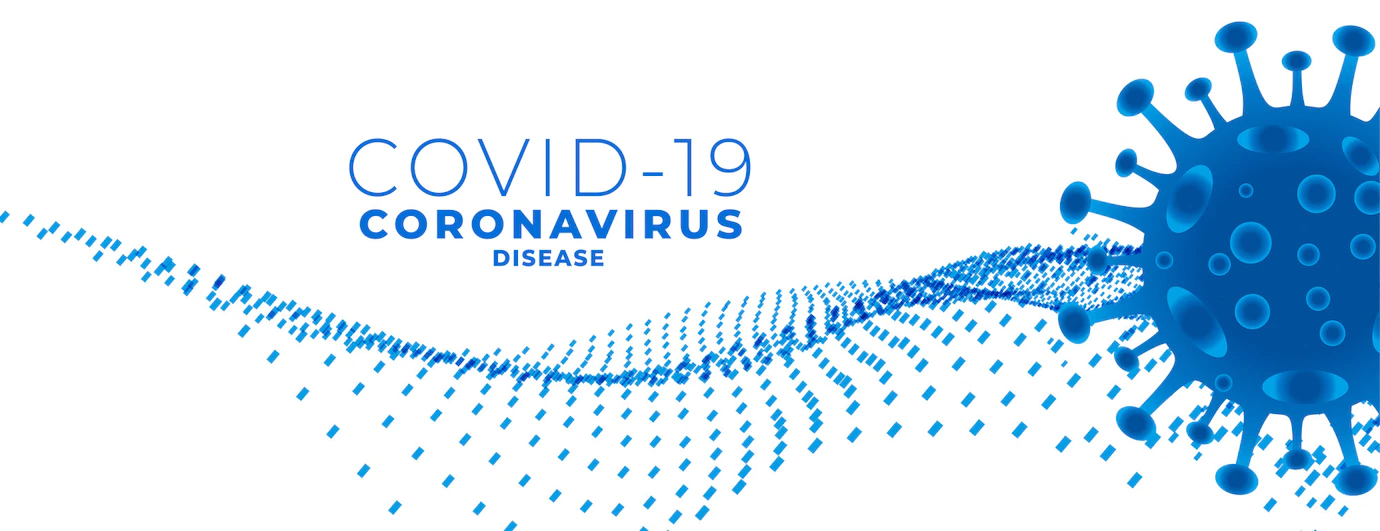

In this project, I will analyze the COVID-19 public data from the beginning of the pandemic until December 31, 2022, and extract insights from the raw data.

With this in mind, we'll study a 2013 dataset from an European bank, available on the Kaggle website. Keep in mind that there are many attributes (columns), but most of them aren't explicit. That is, through a PCA (Principal Component Analysis) transformation, the original data suffered a dimensionality reduction and was transformed into arbitrary values (V's), so that the identity of the transactions can be kept safely.

The dataset I will use in this project is being updated daily throughout the COVID-19 pandemic and is maintained by *Our World in Data*. The complete dataset comes from the [COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19) (JHU), which aggregates official sources, such as the [World Health Organization](https://www.who.int/) (WHO). More information can be found [here](https://github.com/owid/covid-19-data/tree/master/public/data).


The datasets contains transactions made by european cardholders in September 2013 and was shared in Kaggle.

I start the study importing the libraries in Python and the dataset.

While the WHO considers the pandemic global and ongoing as of October 2022, some countries are transitioning their public health approach towards regarding SARS-CoV-2 as an endemic virus.

In this article, we will implement a machine learning model using [python](https://www.python.org/), [pandas](https://pandas.pydata.org/), and [scikit-learn](https://scikit-learn.org/stable/) to grab a transaction database and train the model to be able to classify new transactions as fraudulent or not. 


**Last but not least, thank all the healthcare workers and first responders who have been working hard during this pandemic to save lives.**

*For a complete view of this project, please open it using [google colab](https://bit.ly/3jWMMa9).*

# **Imports**

Below there are all the libraries used in this project.

In [ ]:
# Importing the required libraries needed for this analysis

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['animation.embed_limit'] = 2**6
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Settings for style and appearance
sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)

pd.set_option('display.max_rows', None);


In [ ]:
# Installing Bar Chart Race
!pip install bar_chart_race -q
import bar_chart_race as bcr

     |████████████████████████████████| 156 kB 25.5 MB/s 


In [ ]:
# Installing pywaffle
!pip install pywaffle -q
from pywaffle import Waffle


     |████████████████████████████████| 25.1 MB 133.9 MB/s 


# **Helper Functions**


In [ ]:
# Function make_text

def make_text(rows, # number of rows
              cols, # number of cols
              texts, # number of texts to display
              result, # featured text
              label = '', # detailed text
              font1_size = 80, # featured text font size
              font2_size = 20, # detailed text font size
              ha = 'center', # horizontal alignment
              va = 'center', # vertical alignment
              font1_color = '#4580ba', # featured text font color
              font2_color = '#5F6A6A', # detailed text font color
              font1_weight = 'bold', # featured text font weight
              font2_weight = 'normal', # detailed text font weight
              sup_title = '', # suptitle
              font_suptitle = 30, # font size suptitle
              title1 = '', # title left figure
              title2 = '', # title right figure
              loc = 'center', # loc
              font_title = 20, # font size of titles
              a = 0.5, # percentage for va featured text
              b = 0.5, # percentage for ha featured text
              c = 0.5, # percentage for va detailed text
              d = 0.1, # percentage for ha detailed text
              figsize = (6, 2) # figure size
             ): 
    
    # axes coordenates

    left, width = 0.25, 0.5
    bottom, height = 0.25, 0.5
    right = left + width
    top = bottom + height
    
    # text fonts
    
    fonttitle = {'family': 'sans-serif', 'weight': 'normal', 'size': font_title, 'horizontalalignment': loc}
    font1 = {'family': 'sans-serif', 'color': font1_color, 'weight': font1_weight, 'size': font1_size}
    font2 = {'family': 'sans-serif', 'color':font2_color, 'weight': font2_weight, 'size': font2_size} 
        
    # creating texts
    
    if texts > 1:
        
        # creating the figure for texts
        
        fig, ax = plt.subplots(rows, cols, figsize = figsize)
        
        ax = ax.ravel()
        
        for i in range(len(result)):
            
            if i == 0:
                ax[i].set_title(title1, fontdict = fonttitle)
            elif i == 1:
                ax[i].set_title(title2, fontdict = fonttitle)
                           
            ax[i].set(xlim = (0, 1), ylim = (0, 1))
                
            ax[i].text(a * (left + right), b * (bottom + top), result[i],
                    ha = ha,
                    va = va,
                    fontdict = font1,
                    transform = ax[i].transAxes)
            if label != '':
                ax[i].text(c * (left + right), d * (bottom + top), label[i],
                        ha = ha,
                        va = va,
                        fontdict = font2,
                        transform = ax[i].transAxes)
   
            ax[i].axis('off')
            
        plt.suptitle(sup_title, fontsize = font_suptitle)
                      
    else:
        
        fig, ax = plt.subplots(rows, cols, figsize = figsize)
        
        ax.set_title(title1, fontdict = fonttitle)
        
        ax.set(xlim = (0, 1), ylim = (0, 1))
                
        ax.text(a * (left + right), b * (bottom + top), result,
                ha = ha,
                va = va,
                fontdict = font1,
                transform = ax.transAxes)
        ax.text(c * (left + right), d * (bottom + top), label,
                ha = ha,
                va = va,
                fontdict = font2,
                transform = ax.transAxes)
                
        ax.axis('off')
        
    plt.suptitle(sup_title, fontsize = font_suptitle)
      
    plt.show()

# **Obtaining the Data**

The data used in this project is on  [*Our World in Data*](https://github.com/owid/covid-19-data/tree/master/public/data) portal and is composed of 1 table, **_owid-covid-data.csv_**, which includes all of the historical data on the pandemic up to the date of publication.

The dataset provides information such as confirmed cases, deaths, hospitalizations and tests.

In the `Variables dictionary` section, I will describe most of the variables used in my analysis.

Before moving forward, I will import the table and do some basic visualizations.


In [ ]:
# Importing the data
df_covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

# **Understanding the Dataset**

Understanding the data is a fundamental step in any data science project.

Here we focus on examining the data, extracting insights and main characteristics, as well as understanding how the information is structured.

The step helps us understand the type of problem and how we will solve it.

## **Variables dictionary**


Variable | Description
------|------
`iso_code` | ISO 3166-1 alpha-3 – three-letter country codes in the International Organization for Standardization. Note that OWID-defined regions (e.g. continents like 'Europe') contain prefix 'OWID'. OWID stands for Our World in Data
`continent` | Continent of the geographical location
`location` | Geographical location. Location 'International' considers special regions ("Diamond Princess" and "MS Zandam" cruises)
`date`| Date of observation
`total_cases`|Total confirmed cases of COVID-19. Counts can include probable cases, where reported
`total_cases_per_million`| Total confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported
`new_cases`| New confirmed cases of COVID-19. Counts can include probable cases, where reported. In rare cases where our source reports a negative daily change due to a data correction, the metric is set to NA
`new_cases_smoothed`| New confirmed cases of COVID-19 (7-day smoothed). Counts can include probable cases, where reported
`new_cases_per_million`| Total confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported
`new_cases_smoothed_per_million`| New confirmed cases of COVID-19 (7-day smoothed) per 1,000,000 people. Counts can include probable cases, where reported
`total_deaths`| Total deaths attributed to COVID-19. Counts can include probable deaths, where reported
`total_deaths_per_million`| Total deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported
`new_deaths`| New deaths attributed to COVID-19. Counts can include probable deaths, where reported. In rare cases where our source reports a negative daily change due to a data correction, the metric is set to N.
`new_deaths_smoothed`| New deaths attributed to COVID-19 (7-day smoothed). Counts can include probable deaths, where reported
`new_deaths_per_million`| New deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported
`new_deaths_smoothed_per_million`| New deaths attributed to COVID-19 (7-day smoothed) per 1,000,000 people. Counts can include probable deaths, where reported
`total_tests`| Total tests for COVID-19
`total_tests_per_thousand`| Total tests for COVID-19 per 1,000 people
`new_tests`| New tests for COVID-19 (only calculated for consecutive days)
`new_tests_smoothed`| New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, it is assumed that testing changed equally on a daily basis over any periods in which no data was reported. </p>This produces a complete series of daily figures, which is then averaged over a rolling 7-day window
`new_tests_per_thousand`| Total tests for COVID-19 per 1,000 people
`new_tests_smoothed_per_thousand`| New tests for COVID-19 (7-day smoothed) per 1,000 people
`tests_per_case`| Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average (this is the inverse of positive_rate)
`tests_units`| Units used by the location to report its testing data. A country file can't contain mixed units.</p>All metrics concerning testing data use the specified test unit. Valid units are 'people tested' (number of people tested), 'tests performed' (number of tests performed. a single person can be tested more than once in a given day)</p> and 'samples tested' (number of samples tested. In some cases, more than one sample may be required to perform a given test)
`total_vaccinations` | Total number of COVID-19 vaccination doses administered
`total_vaccinations_per_hundred`| Total number of COVID-19 vaccination doses administered per 100 people in the total population
`people_vaccinated`| Total number of people who received at least one vaccine dose.
`people_fully_vaccinated`| Total number of people who received all doses prescribed by the initial vaccination protocol
`new_vaccinations`| New COVID-19 vaccination doses administered (only calculated for consecutive days)
`new_vaccinations_smoothed`| New COVID-19 vaccination doses administered (7-day smoothed). For countries that don't report vaccination data on a daily basis, it is assumed that vaccination changed equally on a daily basis over any periods in which no data was reported.</p>This produces a complete series of daily figures, which is then averaged over a rolling 7-day window
`new_vaccinations_smoothed_per_million`| New COVID-19 vaccination doses administered (7-day smoothed) per 1,000,000 people in the total population
`people_vaccinated_per_hundred`| Total number of people who received at least one vaccine dose per 100 people in the total population
`people_fully_vaccinated_per_hundred`| Total number of people who received all doses prescribed by the initial vaccination protocol per 100 people in the total population
`new_people_vaccinated_smoothed`| Daily number of people receiving their first vaccine dose (7-day smoothed)
`new_people_vaccinated_smoothed_per_hundred`| Daily number of people receiving their first vaccine dose (7-day smoothed) per 100 people in the total population
`total_boosters`| Total number of COVID-19 vaccination booster doses administered (doses administered beyond the number prescribed by the vaccination protocol)
`total_boosters_per_hundred`| Total number of COVID-19 vaccination booster doses administered per 100 people in the total population
`weekly_hosp_admissions_per_million`| Number of COVID-19 patients newly admitted to hospitals in a given week per 1,000,000 people (reporting date and the preceeding 6 days)
`weekly_hosp_admissions`| Number of COVID-19 patients newly admitted to hospitals in a given week (reporting date and the preceeding 6 days)
`weekly_icu_admissions_per_million`| Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week per 1,000,000 people (reporting date and the preceeding 6 days)
`weekly_icu_admissions`| Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week (reporting date and the preceeding 6 days)
`hosp_patients_per_million`| Number of COVID-19 patients in hospital on a given day per 1,000,000 people
`hosp_patients`| Number of COVID-19 patients in hospital on a given day
`icu_patients_per_million`| Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people
`icu_patients`| Number of COVID-19 patients in intensive care units (ICUs) on a given day
`positive_rate`| The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of tests_per_case)
`reproduction_rate`| Real-time estimate of the effective reproduction rate (R) of COVID-19
`stringency_index`| Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)
`population`| Population (latest available values)
`population_density`| Number of people divided by land area, measured in square kilometers (Km²), most recent year available
`median_age`| Median age of the population, UN projection for 2020
`aged_65_older`|Share of the population that is 65 years and older, most recent year available
`aged_70_older`| Share of the population that is 70 years and older in 2015
`cardiovasc_death_rate`| Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)
`gdp_per_capita`| Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available
`handwashing_facilities`| Share of the population with basic handwashing facilities on premises, most recent year available
`hospital_beds_per_thousand`| Hospital beds per 1,000 people, most recent year available since 2010
`excess_mortality`| Percentage difference between the reported number of weekly or monthly deaths in 2020–2021 and the projected number of deaths for the same period based on previous years
`excess_mortality_cumulative`| Percentage difference between the cumulative number of deaths since 1 January 2020 and the cumulative projected deaths for the same period based on previous years
`excess_mortality_cumulative_absolute`| Cumulative difference between the reported number of deaths since 1 January 2020 and the projected number of deaths for the same period based on previous years
`excess_mortality_cumulative_per_million`| Cumulative difference between the reported number of deaths since 1 January 2020 and the projected number of deaths for the same period based on previous years, per million people
`extreme_poverty`| Share of the population living in extreme poverty, most recent year available since 2010
`cardiovasc_death_rate`| Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)
`diabetes_prevalence`| Diabetes prevalence (% of population aged 20 to 79) in 2017
`female_smokers`| Share of women who smoke, most recent year available
`male_smokers`| Share of men who smoke, most recent year available
`life_expectancy`| Life expectancy at birth in 2019
`human_development_index`| A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living.</p>Values for 2019, imported from http://hdr.undp.org/en/indicators/137506




# **Exploratory Data Analysis (EDA)**
This step is essential to analyze and investigate the data set and summarize the main characteristics.

Let's check the **df_covid** size and take a look at the table, displaying the first 5 entries.

In [ ]:
# Checking the first entries of the dataset
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
# Showing columns name
df_covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

## **Dataset Size and Type of Variables**
Below, we can see the size of the dataset and the types of its variables.


In [ ]:
# Checking dataset's size and number of variables
print("Entries:\t{}".format(df_covid.shape[0]))
print("Variables:\t{}".format(df_covid.shape[1]))
print("\n")

# Checking types of variables
df_covid.dtypes


Entries:	246951
Variables:	67




iso_code                                       object
continent                                      object
location                                       object
date                                           object
total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
reproduction_rate                             float64
icu_patients                                  float64
icu_patients_per_million    

The df_covid table has almost 245,000 rows and 67 columns. 

All columns are of float type except for `iso_code`, 
`continent`, `location`, `date` and `tests_units`.

As the `date` variable represents time, I will convert this column to a **DateTime** format.

In [ ]:
#  Converting the date column to datetime
df_covid.date = pd.to_datetime(df_covid.date)

## **Cleaning the Datasets**

Sometimes, due to typographical errors, we can have attributes referring to the same. For example, Canada and CaNada are not considered the same. To avoid this, I will make sure the name of each country starts with a capitalized letter and the rest is all composed of lower cases. Python allows us to do this by using `title()` function.

In [ ]:
# Setting all locations to initial letter capitalized
df_covid['location'] = df_covid['location'].apply(lambda x: x.title())

# Number of countries available
print('Total of different entries in the location column: {}'.format(len(df_covid.location.value_counts())))

Total of different entries in the location column: 248


As we can see, there is information of **248 different entries** in the `location` column. Before my analysis, I will clean this column as only some entries refer to a country.

I noticed that the location variable contains countries name, some rows with continent name, which has the aggregated information for all countries within that specific continent and some other entries accumulated for regions, all listed below:

* OWID_WRL:	World
* OWID_INT:	International
* OWID_AFR:	Africa
* OWID_ASI:	Asia
* OWID_EUR:	Europe
* OWID_OCE:	Oceania
* OWID_SAM:	South America
* OWID_NAM:	North America
* OWID_EUN:	European Union
* OWID_LIC:	Low income
* OWID_LMC:	Lower middle income
* OWID_HIC:	High income 
* OWID_UMC:	Upper middle income

As I am interested in analyzing at a country level, I will remove those rows from the dataset.

First, I will create a copy of the dataset.

In [ ]:
# Creating a copy of the dataset
df_clean = df_covid.copy()

# Removing continents and other information from the location column
df_clean = df_clean.drop(df_clean[df_clean.location == 'Asia'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'Africa'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'South America'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'North America'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'Europe'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'Oceania'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'European Union'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'High Income'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'Low Income'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'Lower Middle Income'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'Upper Middle Income'].index)
df_clean = df_clean.drop(df_clean[df_clean.location == 'International'].index)

# Another option of removing the totals from location column
# df_clean = df_covid[~df_covid['iso_code'].str.contains('OWID')]

## **Dealing with missing values**

The quality of a dataset is related to the number of missing values. Understanding whether these null values are significant compared to the total entries is crucial to avoid future problems in the analysis. 

That being said, it is crucial to be able to deal with messy data, whether that means missing values, inconsistent formatting, disarranged records, or meaningless outliers.


In [ ]:
# Sorting variables in descending order by missing value count
round((df_clean.isnull().sum()/df_clean.shape[0]).sort_values(ascending=False),2)

excess_mortality_cumulative_per_million       0.96
excess_mortality_cumulative                   0.96
excess_mortality_cumulative_absolute          0.96
excess_mortality                              0.96
weekly_icu_admissions                         0.96
weekly_icu_admissions_per_million             0.96
weekly_hosp_admissions                        0.92
weekly_hosp_admissions_per_million            0.92
total_boosters                                0.86
total_boosters_per_hundred                    0.86
icu_patients                                  0.86
icu_patients_per_million                      0.86
hosp_patients_per_million                     0.85
hosp_patients                                 0.85
new_vaccinations                              0.79
people_fully_vaccinated                       0.76
people_fully_vaccinated_per_hundred           0.76
people_vaccinated_per_hundred                 0.75
people_vaccinated                             0.75
total_vaccinations_per_hundred 

As seen above, over 90% of missing values are in the `excess_mortality_cumulative_per_million`, `excess_mortality_cumulative`, `excess_mortality_cumulative_absolute`, `excess_mortality`, `weekly_icu_admissions`, `weekly_icu_admissions_per_million`, `weekly_hosp_admissions`, `weekly_hosp_admissions_per_million` columns. I will not include those columns in my analysis.

Columns such as `total_deaths` (14% of missing values) and `total_cases` (6% of missing values), and `people_fully_vaccinated` (76% of missing values) will be important in my analysis and, therefore, I will treat those accordingly in this project.

Finally, there is no missing values in the `location`, `date` and `population` columns.

# **Data Analysis**
## **COVID-19 in the World**
In order to have a better understanding of the pandemic, I will extract the most recent data available.

In [ ]:
# Displaying the most recent date available in the dataset
last_date = str(df_clean.date.max())[0:10]
last_date

As mentioned, the dataset is being updated daily throughout the COVID-19 pandemic. As the most recent available date is **December 31, 2022** (at the time of the data extraction for this project), I will pass **2022-12-31** as the parameter and take a look at the country with the highest number of cases up to this date.

Total cases of covid-19: 660300641.0
Total death of covid-19: 6689977.0


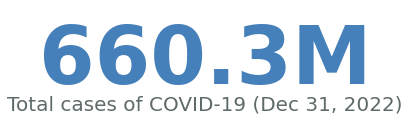

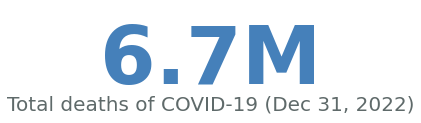

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
243914,OWID_WRL,NaN,World,2022-12-31,660300641.0,257138.0,493547.286,6689977.0,721.0,1705.857,82795.228,32.243,61.886,838.858,0.090,0.214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.316728e+10,5.511208e+09,5.057365e+09,2.676494e+09,NaN,NaN,165.10,69.11,63.41,33.56,NaN,NaN,NaN,NaN,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
233173,USA,North America,United States,2022-12-31,100749731.0,6289.0,52640.000,1092674.0,13.0,338.571,297820.727,18.591,155.606,3229.993,0.038,1.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,3.382899e+08,NaN,NaN,NaN,NaN
101556,IND,Asia,India,2022-12-31,44679873.0,265.0,220.429,530705.0,3.0,1.714,31527.463,0.187,0.156,374.481,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.200990e+09,1.027201e+09,9.512074e+08,2.225816e+08,88286.0,84512.0,155.31,72.48,67.12,15.71,60.0,7676.0,0.001,NaN,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
78261,FRA,Europe,France,2022-12-31,39334073.0,NaN,NaN,162031.0,NaN,NaN,580037.353,NaN,NaN,2389.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.100,35.600,NaN,5.980,82.66,0.901,6.781300e+07,NaN,NaN,NaN,NaN
83443,DEU,Europe,Germany,2022-12-31,37369866.0,1.0,27431.571,161465.0,NaN,NaN,448242.026,0.012,329.035,1936.732,NaN,NaN,NaN,1364.0,16.361,NaN,NaN,1100.0,13.194,6363.0,76.323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.200,33.100,NaN,8.000,81.33,0.947,8.336984e+07,NaN,NaN,NaN,NaN
31101,BRA,South America,Brazil,2022-12-31,36331281.0,NaN,NaN,693853.0,NaN,NaN,168736.658,NaN,NaN,3222.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.803339e+08,1.885539e+08,1.748879e+08,1.226294e+08,1141.0,8706.0,223.09,87.57,81.22,56.95,40.0,1889.0,0.001,NaN,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88,0.765,2.153135e+08,NaN,NaN,NaN,NaN


In [ ]:
# Total cases on 12/31/22
print('Total cases of covid-19: {}'.format(df_clean['total_cases'].loc[df_clean.date == last_date][df_clean.location == 'World'].item()))

# Total death on 12/31/22
print('Total death of covid-19: {}'.format(df_clean['total_deaths'].loc[df_clean.date == last_date][df_clean.location == 'World'].item()))

# making the text
make_text(1,
          1,
          1,
          str(round(df_clean['total_cases'].loc[df_clean.date == last_date][df_clean.location == 'World'].item()/1000000,1)) + 'M',
          'Total cases of COVID-19 (Dec 31, 2022)')

# making the text
make_text(1,
          1,
          1,
          str(round(df_clean['total_deaths'].loc[df_clean.date == last_date][df_clean.location == 'World'].item()/1000000,1)) + 'M',
          'Total deaths of COVID-19 (Dec 31, 2022)')


print('\n\n')

# Countries with the highest number of cases on Dec 31, 2022
df_clean.loc[df_clean.date == last_date].sort_values(by="total_cases", ascending=False).head(6)



<br/>

Let's plot the total cases by country.



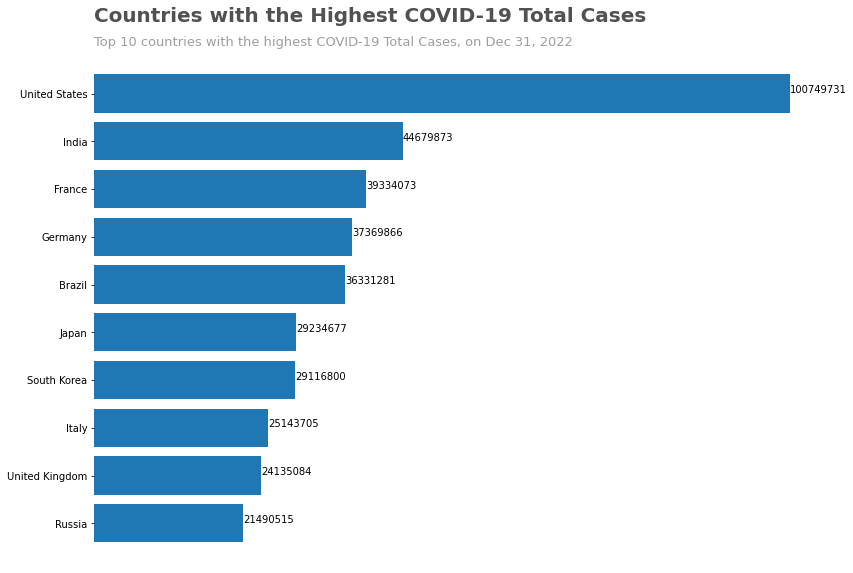

In [ ]:
print("\n\n")

from matplotlib.gridspec import tight_layout

# Setting font as sans-serif
plt.rcParams['font.family'] = 'sans-serif'

# Setting colours
grey = "#9E9E9E"
# grey = "#5F6A6A"
grey_text = "#515151"


top_10_total_cases = df_clean.loc[df_clean.date == last_date, ['location', 
                                                                'total_cases']].sort_values(by="total_cases", ascending=False)[1:11].sort_values(by="total_cases", ascending=True)
fig, ax = plt.subplots(figsize=(12,8))

ax.barh('location', 'total_cases', data = top_10_total_cases)

# Removing spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Removing xticks
ax.set_xticks(ticks=[])


# Adding title
plt.text(-1.15, 10.5,'Countries with the Highest COVID-19 Total Cases', fontsize=20, color=grey_text, fontweight='bold')
plt.text(-1.15, 10,'Top 10 countries with the highest COVID-19 Total Cases, on Dec 31, 2022', fontsize=13, color=grey)


initialx=0

# Adding labels
for p in ax.patches:
  ax.text(p.get_width(),
          initialx+p.get_height()/50,
          '{:1.0f}'.format(p.get_width()))
  initialx+=1

plt.tight_layout()

The count of total cases of COVID-19 in the World reported up to December, 31 2022 was **660.3 millions**. The total death was about **6.7 million** (or 1% of the cases).

The leading countries in total cases are:
* United States - 100.7 million cases
* India - 44.7 million cases
* France - 39.3 million cases
* Germany - 37.4 million cases
* Brazil - 36.3 million cases

<br/>

Now, let's take a look at the total death up to 12/31/2022.


In [ ]:
# Countries with the highest number of deaths on Dec 31st, 2022
df_clean.loc[df_clean.date == last_date].sort_values(by="total_deaths", ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
233173,USA,North America,United States,2022-12-31,100749731.0,6289.0,52640.000,1092674.0,13.0,338.571,297820.727,18.591,155.606,3229.993,0.038,1.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,3.382899e+08,NaN,NaN,NaN,NaN
31101,BRA,South America,Brazil,2022-12-31,36331281.0,NaN,NaN,693853.0,NaN,NaN,168736.658,NaN,NaN,3222.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.803339e+08,1.885539e+08,174887915.0,122629436.0,1141.0,8706.0,223.09,87.57,81.22,56.95,40.0,1889.0,0.001,NaN,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,2.153135e+08,NaN,NaN,NaN,NaN
101556,IND,Asia,India,2022-12-31,44679873.0,265.0,220.429,530705.0,3.0,1.714,31527.463,0.187,0.156,374.481,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.200990e+09,1.027201e+09,951207411.0,222581622.0,88286.0,84512.0,155.31,72.48,67.12,15.71,60.0,7676.0,0.001,NaN,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
183307,RUS,Europe,Russia,2022-12-31,21490515.0,5469.0,5777.000,385789.0,57.0,54.000,148504.064,37.792,39.920,2665.885,0.394,0.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6379.0,44.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838890e+08,8.766915e+07,78929790.0,19528894.0,NaN,75818.0,127.07,60.58,54.54,13.49,524.0,10364.0,0.007,NaN,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,1.447133e+08,NaN,NaN,NaN,NaN
142142,MEX,North America,Mexico,2022-12-31,7234467.0,NaN,NaN,331099.0,NaN,NaN,56739.084,NaN,NaN,2596.771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,1.275041e+08,NaN,NaN,NaN,NaN


Let's plot a bar chart of the total death by country.

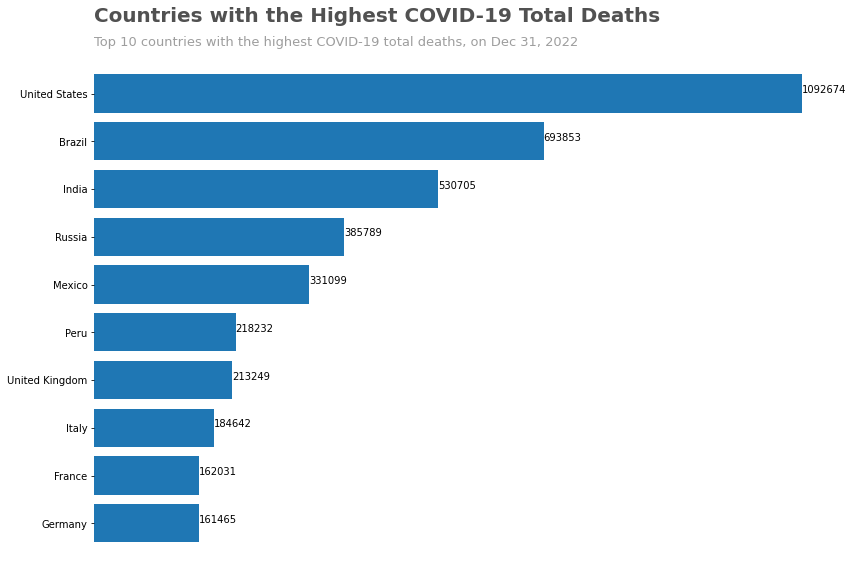

In [ ]:
print("\n\n")

from matplotlib.gridspec import tight_layout

# Settign font as sans-serif
plt.rcParams['font.family'] = 'sans-serif'

# Setting colours
grey = "#9E9E9E"
# grey = "#5F6A6A"
grey_text = "#515151"


top_10_total_deaths = df_clean.loc[df_clean.date == last_date, ['location', 
                                                                'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:11].sort_values(by="total_deaths", ascending=True)
fig, ax = plt.subplots(figsize=(12,8))

ax.barh('location', 'total_deaths', data = top_10_total_deaths)

# Removing spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Removing xticks
ax.set_xticks(ticks=[])


# Adding title
plt.text(-1.15, 10.5,'Countries with the Highest COVID-19 Total Deaths', fontsize=20, color=grey_text, fontweight='bold')
plt.text(-1.15, 10,'Top 10 countries with the highest COVID-19 total deaths, on Dec 31, 2022', fontsize=13, color=grey)

initialx=0

# Adding labels
for p in ax.patches:
  ax.text(p.get_width(),
          initialx+p.get_height()/50,
          '{:1.0f}'.format(p.get_width()))
  initialx+=1


plt.tight_layout()

As we can see, Brazil is the second country with the highest number of deaths, totalling 693.8 thousand victims up to 12/31/2022.

The United States ranks first, with more than 1,09 million deaths. India, Russia and Mexico occupy the third, fourth and fifth positions, respectively.
 
Canada is not among the top 10 countries of total deaths. I will conduct some analysis with Canada on this project.

Here I am looking at absolute numbers, and the population size may interfere with these results. Therefore, it is worth having in mind the population scale, considering that China is the most populous country in the world, followed by India (2nd most populous) and the USA (3rd most populous). Brazil is in the 7th place in terms of the total population.


## **Total Cases and Deaths Timeline (worldwide)**


One of the biggest concerns of health organizations has been the progression of the number of cases and deaths in the world.

The line chart is one of the best ways to visualize evolution over time. Therefore, I will plot line graphs to demonstrate the evolution of cases and deaths in the world.

For that, I will use the 'df_world' dataset, which contains the daily registers of COVID-19.

In [ ]:
# Creating a dataset with the daily registers of Covid-19
df_world = df_clean.loc[df_clean.location == "World"]

# Checking missing values in the tota_cases, total_deaths, new_cases and new_deaths columns
print("Missing values in total_cases column: {}".format(df_world.total_cases.isnull().sum()))
print("Missing values in total_deaths column: {}".format(df_world.total_deaths.isnull().sum()))
print("Missing values in new_cases column: {}".format(df_world.new_cases.isnull().sum()))
print("Missing values in new_deaths column: {}".format(df_world.new_deaths.isnull().sum()))

Missing values in total_cases column: 0
Missing values in total_deaths column: 0
Missing values in new_cases column: 0
Missing values in new_deaths column: 0


As we can see, there are no missing observations in the `total_cases`, `total_deaths`, `new_cases` and `new_deaths` variables for the world data.

Let's now check the total cases and total deaths over the years.

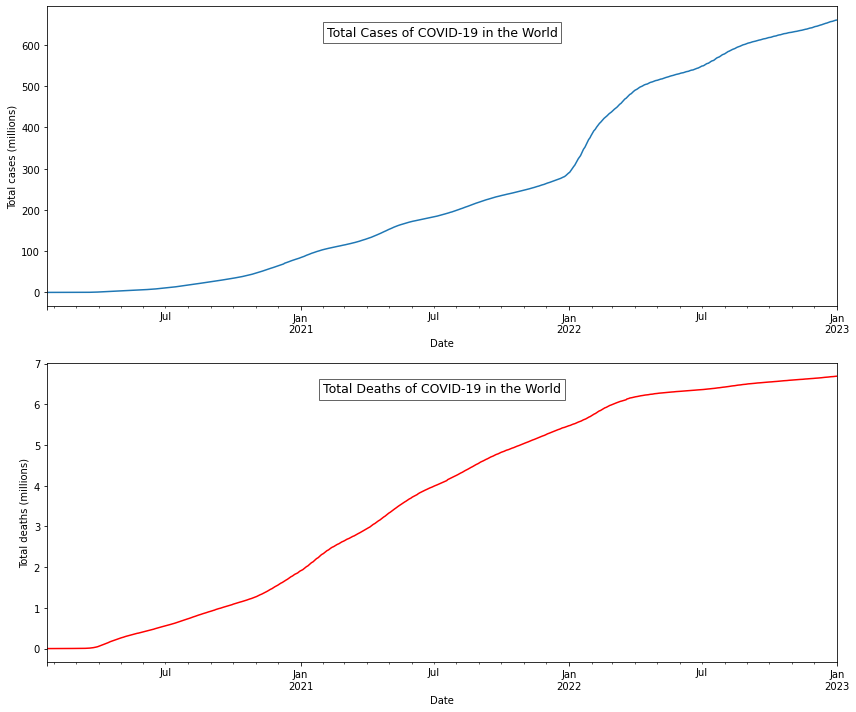

In [ ]:
# Passing date column as new index
df_world.index = df_world.date

# Plotting total cases and total deaths
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1, figsize=(12,10))

def add_titlebox(ax, text):
     ax.text(.50, .9, text,
         horizontalalignment='center',
         transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.6),
         fontsize=12.5)
     return ax

(df_world['total_cases'] / 1000000).plot(kind="line", ax=ax1)
add_titlebox(ax1, 'Total Cases of COVID-19 in the World')
ax1.set_ylabel("Total cases (millions)")
ax1.set_xlabel("Date")

(df_world['total_deaths'] / 1000000).plot(kind="line", ax=ax2, color="r")
add_titlebox(ax2, 'Total Deaths of COVID-19 in the World')
ax2.set_ylabel("Total deaths (millions)")
ax2.set_xlabel("Date")

plt.tight_layout()

As we can see, at the beginning of 2022, we had an abrupt growth in the total number of cases. However, the increase in deaths began to slow along 2022.

I will plot charts showing the new cases and deaths daily throughout the pandemic.

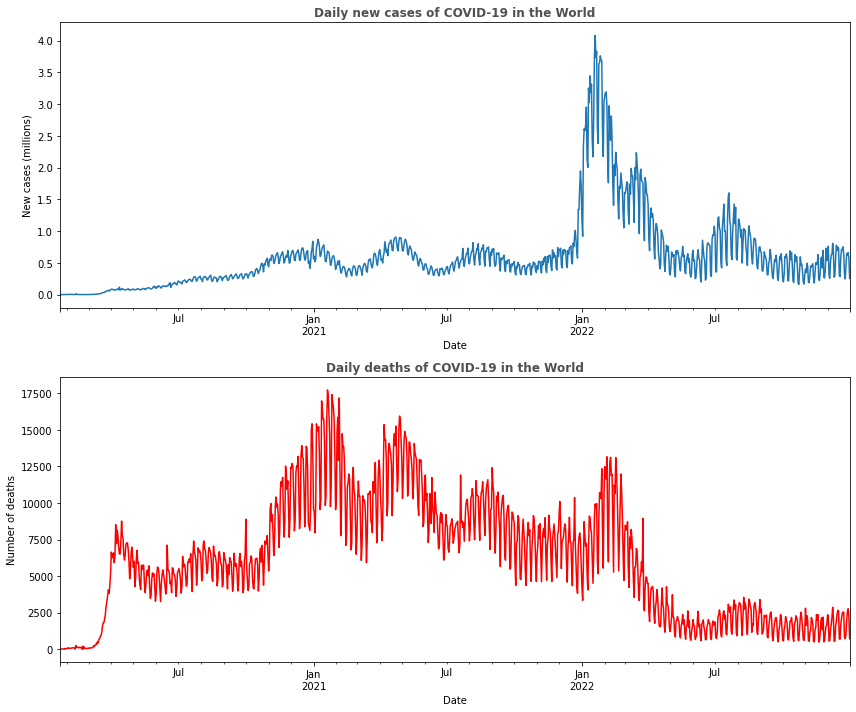

In [ ]:
# Plotting new cases and new deaths
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1, figsize=(12,10))

(df_world['new_cases'] / 1000000).plot(kind="line", ax=ax1)
ax1.set_title("Daily new cases of COVID-19 in the World", color = grey_text, fontweight='bold')

# add_titlebox(ax1, 'Total Cases of COVID-19 in the World')
ax1.set_ylabel("New cases (millions)")
ax1.set_xlabel("Date")

(df_world['new_deaths']).plot(kind="line", ax=ax2, color="r")
#ax2.set_title("Mortes por Covid-19 no Mundo")
ax2.set_title("Daily deaths of COVID-19 in the World", color = grey_text, fontweight='bold')
ax2.set_ylabel("Number of deaths")
ax2.set_xlabel("Date")

plt.tight_layout()

The number of new cases and deaths stabilized at lower levels in 2022 compared to the beginning of the pandemic.

The preventive measures against COVID-19 and the vaccines are saving lives every day.

I will conduct a deeper analysis of the daily COVID-19 vaccines progress in this project.


## **Total Cases and Deaths Timeline (by Country)**


As mentioned before, there are missing values in the `total_cases` and `total_deaths` values when looking at the data by country.

Before the first case and first death being registered, those columns were filled with `NaN`. That being said, I will replace the `NaN` values in the `total_deaths` and `total_cases` columns with zero, using the `fillna` function.

In [ ]:
# Creating a dataset with only countries' information
df_countries = df_clean.loc[df_clean.location != "World"]
df_countries.head()

# Pivoting the data to reorganize data columns and rows
df_deaths = df_countries.pivot(index="date", columns="location", values="total_deaths")
df_cases = df_countries.pivot(index="date", columns="location", values="total_cases")

# Replacing NaN values with zero
df_deaths = df_deaths.fillna(0)
df_cases = df_cases.fillna(0)

# Displaying the first 5 entries of the df_deaths dataset
df_deaths.head()

location,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius And Saba,Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Cook Islands,Costa Rica,Cote D'Ivoire,Croatia,Cuba,Curacao,Cyprus,Czechia,Democratic Republic Of Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,England,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Faeroe Islands,Falkland Islands,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guam,Guatemala,Guernsey,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Isle Of Man,Israel,Italy,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,Kiribati,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macao,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia (Country),Moldova,Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,North Korea,North Macedonia,Northern Cyprus,Northern Ireland,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Pitcairn,Poland,Portugal,Puerto Rico,Qatar,Romania,Russia,Rwanda,Saint Helena,Saint Kitts And Nevis,Saint Lucia,Saint Pierre And Miquelon,Saint Vincent And The Grenadines,Samoa,San Marino,Sao Tome And Principe,Saudi Arabia,Scotland,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Sint Maarten (Dutch Part),Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Tokelau,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wales,Wallis And Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Let's check the daily progress of COVID-19 in terms of total cases and deaths worldwide.

I will use a bar chart race of the top 10 countries with more cases and deaths daily since the pandemic's beginning up to December 31, 2022.

As we can see, the first cases and deaths of COVID-19 were registered in China. Outside China, United Kindom was the first country with a confirmed death from the virus, reported in January 2020.

In April 2020, the USA surpassed all the other countries as the leading country in total deaths for COVID-19 and remained in the first position until **December 31, 2022**.

In the middle of 2020, Brazil got second place in the rank of total deaths and has kept in this position over the years, although it was in 5th place in terms of total cases on December 31, 2022.

Canada is not included in the top 10 of the total cases, nor total deaths. A deep analysis with Canada will be conducted in this project.

As mentioned before, those are absolute numbers, and the population size may interfere with those results. Let's keep in mind the population size, knowing that China is the most populous country in the world, following by India and USA. Brazil is in the 7th place in terms of total population.

## **The vaccination against COVID-19 in the World**


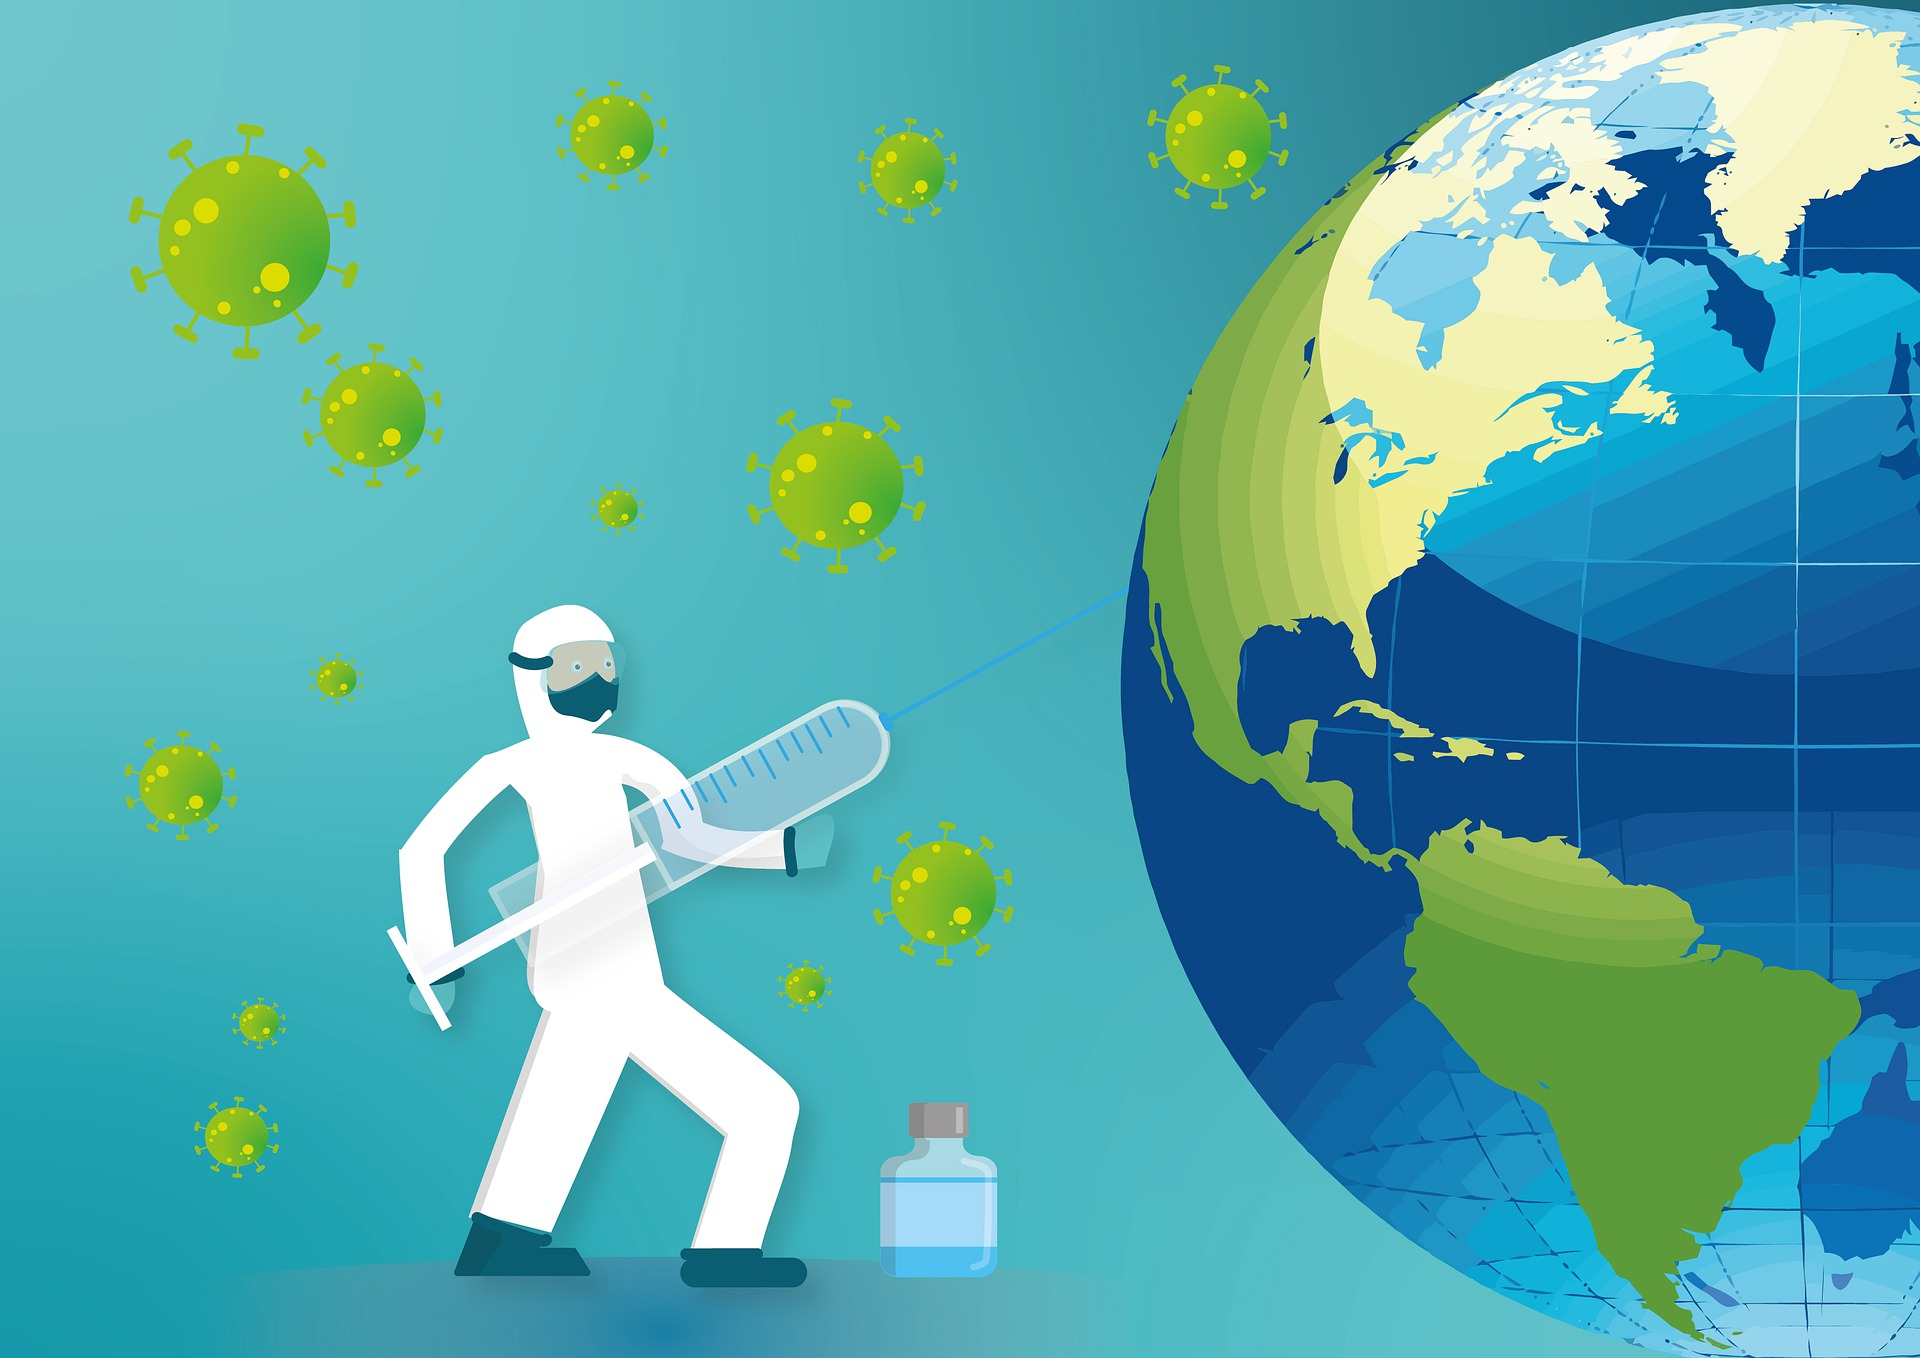

In order to bring the pandemic to an end, a large share of the world needs to be immune to the virus. The safest way to achieve this is with the vaccine.

Let's check when the first COVID-19 vaccine was administered.

In [ ]:
# Displaying the first vaccine date
df_world.loc[df_world['people_vaccinated']> 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-04,OWID_WRL,NaN,World,2020-12-04,66060641.0,696404.0,607365.429,1594832.0,12470.0,10891.286,8283.357,87.322,76.158,199.976,1.564,1.366,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,NaN,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN


The first vaccine was administered on **2020-12-04**.


Lets check the total of people who received at least two doses of the vaccine. In this project, I will use the terms **people that received at least two doses** and **people fully vaccinated** interchangeable.

I will verify the percentage of people who received at least 2 COVID-19 vaccination doses in the total population.

For that, I will use the `df_world` dataset, filtering for the most recent date (2022-12-31).

In [ ]:
# Filtering the df_world dataset for the last date available
df_today = df_world[df_world.date == last_date]
df_today

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-31,OWID_WRL,NaN,World,2022-12-31,660300641.0,257138.0,493547.286,6689977.0,721.0,1705.857,82795.228,32.243,61.886,838.858,0.09,0.214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.316728e+10,5.511208e+09,5.057365e+09,2.676494e+09,NaN,NaN,165.1,69.11,63.41,33.56,NaN,NaN,NaN,NaN,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN


63.414404359322454


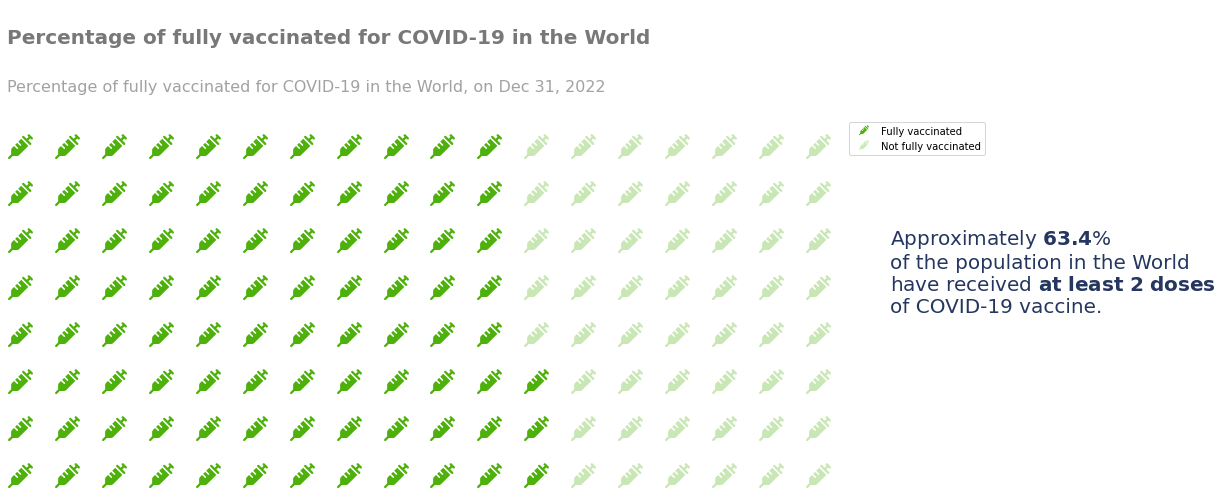

In [ ]:
# Total people fully vaccinated in the World
ttl_vac = df_today['people_fully_vaccinated'].item()
ttl_vac

# Total population in World
pop = df_today['population'].item()
pop


# Percentage of fully vaccinated for COVID-19 in Canada
prop_vac = (ttl_vac / pop) * 100
print(prop_vac)


# Plotting 
fig = plt.figure(
    FigureClass=Waffle,
    figsize=(15,8),
    rows=8,
    columns=18,
    # colors=("#4EB00A", "#F50805"),
    colors=("#4EB00A", "#c9e7b5"),
    # colors=("#F50805", "#fdcdcd"),
    # colors=("#4EB00A", "#fdcdcd"),

    values=[prop_vac, 100-prop_vac], icons='syringe', icon_size=25,
    icon_legend=True,
    legend={
        'labels': ['Fully vaccinated', 'Not fully vaccinated'],
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1)
    }
)

plt.text(0, 1.2, '\nPercentage of fully vaccinated for COVID-19 in the World',
         fontsize=20, 
         color="#787878",
         weight='bold')

plt.text(0, 1.15,
         "\nPercentage of fully vaccinated for COVID-19 in the World, on Dec 31, 2022",
         verticalalignment="top",
         fontsize=16,
         color="#A2A1A3")

plt.text(2.4, 0.7,
         "Approximately "
         "$\\bf{63.4}$%\n"
         "of the population in the World\n"
         "have received $\\bf{at}$ $\\bf{least}$ $\\bf{2}$ $\\bf{doses}$\n"
         "of COVID-19 vaccine.",
         verticalalignment="top",
         fontsize=20,
         color="#253760")


fig.set_tight_layout(False)
plt.show();

<br/>

Let's now plot a map that shows the total number of people who received at least two vaccine doses per 100 people in the total population.

For that, I will use the `people_fully_vaccinated_per_hundred` column.

In [ ]:
df_ppl_vac_per_hundred	 = df_countries[df_countries.date == last_date]
df_ppl_vac_per_hundred['people_fully_vaccinated_per_hundred'].head()

1041   NaN
3137   NaN
4179   NaN
5215   NaN
6233   NaN
Name: people_fully_vaccinated_per_hundred, dtype: float64

As we can see, there are missing values in the `people_fully_vaccinated_per_hundred` column, even for the most recent date. Knowing that, I will extract the most recent information available, which will be the maximum of the `people_fully_vaccinated_per_hundred` column, grouped for each country. Python allows us to do this by using `groupby()` and `max()` functions.

In [ ]:
# Grouping by country and extracting the max value in the people_fully_vaccinated_per_hundred column
perc_fully_vac = df_countries.groupby(['iso_code', 'location'])['people_fully_vaccinated_per_hundred'].max().reset_index().sort_values('people_fully_vaccinated_per_hundred', ascending=False)

print("Missing values in people_fully_vaccinated_per_hundred column: {}".format(perc_fully_vac.people_fully_vaccinated_per_hundred.isnull().sum()), '\n')
display(perc_fully_vac.head(6))
print('\n')
display(perc_fully_vac.tail(13))


Missing values in people_fully_vaccinated_per_hundred column: 12 



,iso_code,location,people_fully_vaccinated_per_hundred
75,GIB,Gibraltar,126.89
207,TKL,Tokelau,116.38
176,QAT,Qatar,105.75
6,ARE,United Arab Emirates,103.72
164,PCN,Pitcairn,100.00
29,BRN,Brunei,99.32


,iso_code,location,people_fully_vaccinated_per_hundred
13,BDI,Burundi,0.22
59,ERI,Eritrea,NaN
60,ESH,Western Sahara,NaN
69,FSM,Micronesia (Country),NaN
84,GUM,Guam,NaN
130,MHL,Marshall Islands,NaN
137,MNP,Northern Mariana Islands,NaN
167,PLW,Palau,NaN
170,PRI,Puerto Rico,NaN
171,PRK,North Korea,NaN


As it does not make sense to have over 100 people vaccinated per hundred people, those locations that are showing values over 100, I will replace those values with the maximum possible value (100).

I will also drop the missing values as we do not have the information for any time throughout the pandemic.

In [ ]:
# Dropping rows with NaN
perc_fully_vac = perc_fully_vac.dropna(axis=0)
perc_fully_vac.tail()


,iso_code,location,people_fully_vaccinated_per_hundred
127,MDG,Madagascar,6.69
168,PNG,Papua New Guinea,3.00
231,YEM,Yemen,2.25
89,HTI,Haiti,2.05
13,BDI,Burundi,0.22


In [ ]:
# Replacing the values over 100 with 100
perc_fully_vac.people_fully_vaccinated_per_hundred.loc[(perc_fully_vac.people_fully_vaccinated_per_hundred>100.00)] = 100
perc_fully_vac.head(6)

,iso_code,location,people_fully_vaccinated_per_hundred
75,GIB,Gibraltar,100.00
207,TKL,Tokelau,100.00
176,QAT,Qatar,100.00
6,ARE,United Arab Emirates,100.00
164,PCN,Pitcairn,100.00
29,BRN,Brunei,99.32


In [ ]:
# Plotting the map 
fig = px.choropleth(perc_fully_vac, locations="iso_code",
                    color='people_fully_vaccinated_per_hundred',
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Blues,
                    width=1500,
                    height=600)

fig.update_layout(title=go.layout.Title(text="<b>Total peoply fully vaccinated by country, in Dec 31, 2022</b>", x=0.076, y=0.99, font=dict(
                family="sans-serif",
                size=18,
                color="#787878"
            )))

fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='<b>China</b> is one of the country with the highest proportion of people who received at least 2 doses of the COVID-19 vaccine (<b>89.3% of the population</b>).',
            xanchor='right',
            x=0.96,
            xshift=5,
            yanchor='top',
            y=1.07,
            font=dict(
                family="sans-serif",
                size=14,
                color="#A2A1A3"
            )
        )])

fig.layout.coloraxis.colorbar.title = 'People who received at least 2 doses per 100 people'

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)
        
fig.show()

**China** is among the countries with the highest percentage of people who received two doses, totalling **89.3%** of the population as fully vaccinated. In **Canada**, approximately **82.5%** of the population received at least 2 doses. In the **United States**, **69.0%** of the population is considered fully vaccinated. As we know, many anti-vaccine movement happened around the world, which may be one of the reason for this lower proportion of fully vaccinated in USA.




#**COVID-19 in Canada**#

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Flag_of_Canada_%28leaf%29.svg/1200px-Flag_of_Canada_%28leaf%29.svg.png' width=50></center>



Canada is one of the most visited countries in the world.

Due to the pandemic, the Government of Canada took several measures to protect the health and safety of its residents and everyone in the world. Those measures included COVID-19 entry restrictions, testing, quarantine, mandatory use of masks and isolation requirements for anyone entering in the country.

I will carry out an exploratory analysis for Canada, seeking to show some characteristics of the pandemic in the country.

I will use the `df_canada` dataset, which contains the daily registers of COVID-19 in Canada.

In [ ]:
# Creating a dataset with the daily registers of Covid-19 in Canada
df_canada = df_clean.loc[df_clean.location == "Canada"]
df_canada.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
38310,CAN,North America,Canada,2020-01-23,2.0,2.0,NaN,NaN,NaN,NaN,0.052,0.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
38311,CAN,North America,Canada,2020-01-24,3.0,1.0,NaN,NaN,NaN,NaN,0.078,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
38312,CAN,North America,Canada,2020-01-25,3.0,0.0,NaN,NaN,NaN,NaN,0.078,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
38313,CAN,North America,Canada,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,0.078,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,-873.4,-3.41,-2.47,-22.712658
38314,CAN,North America,Canada,2020-01-27,3.0,0.0,NaN,NaN,NaN,NaN,0.078,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN


In [ ]:
display(df_canada.date.min())
display(df_canada.date.max())

Timestamp('2020-01-23 00:00:00')

Timestamp('2022-12-31 00:00:00')

The dataset includes daily information from **2020-01-23** to **2022-12-31**.


In [ ]:
# Displaying the first registered case
df_canada.loc[df_canada['new_cases']> 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
38310,CAN,North America,Canada,2020-01-23,2.0,2.0,NaN,NaN,NaN,NaN,0.052,0.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN


In [ ]:
# Displaying the first registered death
df_canada.loc[df_canada['new_deaths']> 0.0].head(1) 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
38356,CAN,North America,Canada,2020-03-09,144.0,24.0,14.143,1.0,1.0,NaN,3.745,0.624,0.368,0.026,0.026,NaN,2.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3531.0,832.0,0.093,0.022,407.0,0.011,0.0347,28.8,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN


In [ ]:
# Calculating how many days from the first case to the first death

from datetime import date
delta = df_canada.date.loc[38356] - df_canada.date.loc[38310]
print('{} days between the first case and the first death for COVID-19 in Canada.'.format(delta.days))


46 days between the first case and the first death for COVID-19 in Canada.


In Canada, the first case of COVID-19 was registered in **2020-01-23** and the first death occurred **46 days later** (on **2020-03-09**).

Let's check how many people got infected and how many recovered in Canada.

Total cases of covid-19 in Canada: 4505142.0
Total death of covid-19 in Canada: 49238.0
Total recovered of covid-19 in Canada: 4.455904




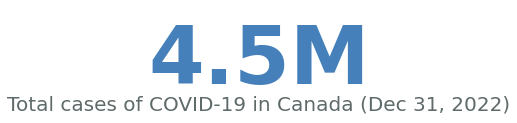

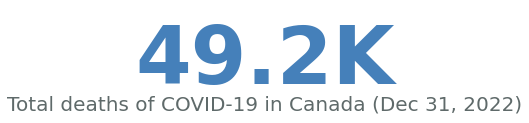

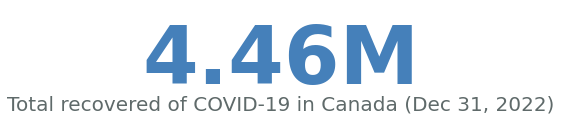

In [ ]:
# Total cases in 12/31/22
print('Total cases of covid-19 in Canada: {}'.format(df_canada['total_cases'].loc[df_canada.date == last_date].item()))

# Total death in 12/31/22
print('Total death of covid-19 in Canada: {}'.format(df_canada['total_deaths'].loc[df_canada.date == last_date].item()))
# Total recovered in 12/31/22

ttl_rec = round((df_canada['total_cases'].loc[df_canada.date == last_date].item()-df_canada['total_deaths'].loc[df_canada.date == last_date].item())/1000000,2)
print('Total recovered of covid-19 in Canada: {}'.format((df_canada['total_cases'].loc[df_canada.date == last_date].item()-df_canada['total_deaths'].loc[df_canada.date == last_date].item())/1000000))
print('\n')

# making the text
make_text(1,
          1,
          1,
          str(round(df_canada['total_cases'].loc[df_canada.date == last_date].item()/1000000,1)) + 'M',
          'Total cases of COVID-19 in Canada (Dec 31, 2022)')

# making the text
make_text(1,
          1,
          1,
          str(round(df_canada['total_deaths'].loc[df_canada.date == last_date].item()/1000,1)) + 'K',
          'Total deaths of COVID-19 in Canada (Dec 31, 2022)')

# # making the text
make_text(1,
          1,
          1,
          str(round((df_canada['total_cases'].loc[df_canada.date == last_date].item()-df_canada['total_deaths'].loc[df_canada.date == last_date].item())/1000000,2)) + 'M',
          'Total recovered of COVID-19 in Canada (Dec 31, 2022)')



The count of total cases of COVID-19 in Canada reported up to December, 31 2022 was 4.5 million. The total death was about 49.2 thousand. Approximately 99% of the infected were able to recover from the virus.

##**Total Cases and Deaths Timeline (Canada)**


Canada's health organizations have been concerned with the daily progression of the number of cases and deaths in the country.

I will plot line graphs to demonstrate the evolution of total cases and total deaths since the beginning of the pandemic.

In [ ]:
# Creating a dataset with the daily registers of Covid-19
df_canada = df_clean.loc[df_clean.location == "Canada"]

# Checking missing values in the tota_cases, total_deaths, new_cases and new_deaths columns
print("Missing values in total_cases column: {}".format(df_canada.total_cases.isnull().sum()))
print("Missing values in total_deaths column: {}".format(df_canada.total_deaths.isnull().sum()))
print("Missing values in new_cases column: {}".format(df_canada.new_cases.isnull().sum()))
print("Missing values in new_deaths column: {}".format(df_canada.new_deaths.isnull().sum()))


Missing values in total_cases column: 0
Missing values in total_deaths column: 46
Missing values in new_cases column: 2
Missing values in new_deaths column: 49


Before the first case and first death be registered, the `new_cases', 'new_deaths` and `total_deaths` columns were filled with `NaN`. I will replace the NaN values in those columns with zero.

In [ ]:
# Replacing NaN values with zero
df_canada.new_cases.replace(np.nan, 0, inplace=True)
df_canada.new_deaths.replace(np.nan, 0, inplace=True)
df_canada.total_deaths.replace(np.nan, 0, inplace=True)

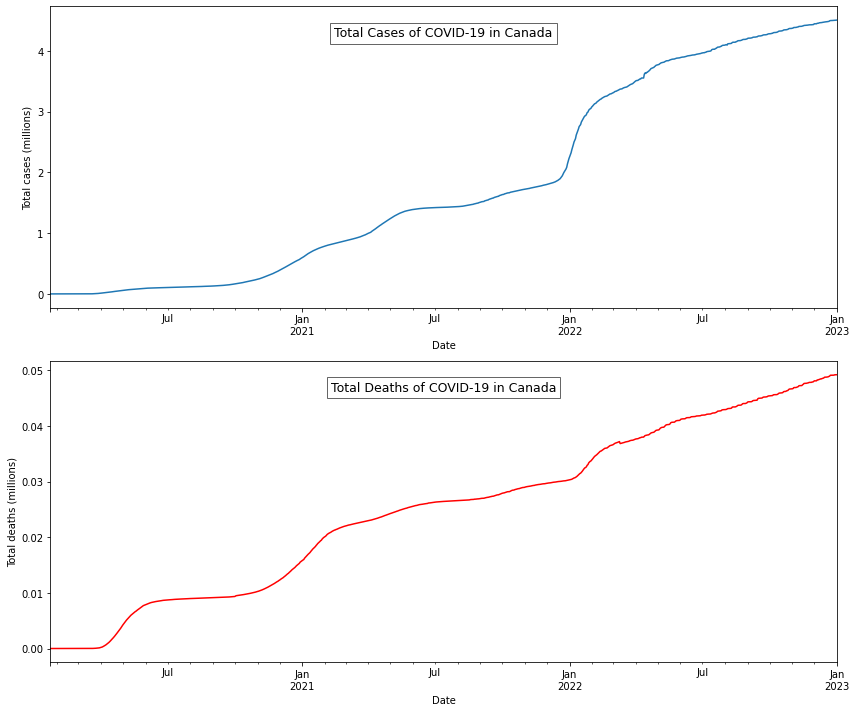

In [ ]:
# Passing date column as new index
df_canada.index = df_canada.date

# Plotting total cases and total deaths
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1, figsize=(12,10))

def add_titlebox(ax, text):
     ax.text(.50, .9, text,
         horizontalalignment='center',
         transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.6),
         fontsize=12.5)
     return ax

(df_canada['total_cases'] / 1000000).plot(kind="line", ax=ax1)
add_titlebox(ax1, 'Total Cases of COVID-19 in Canada')
ax1.set_ylabel("Total cases (millions)")
ax1.set_xlabel("Date")

(df_canada['total_deaths'] / 1000000).plot(kind="line", ax=ax2, color="r")
add_titlebox(ax2, 'Total Deaths of COVID-19 in Canada')
ax2.set_ylabel("Total deaths (millions)")
ax2.set_xlabel("Date")

plt.tight_layout()

As we can see, in the beginning of 2022 we had an abrupt growth in the total number of cases. However, the increase in deaths began to slow along 2022 (a similar situation happened worldwide, as previously illustrated).

I will plot charts with those variables throughout the pandemic to visualize the new cases and new deaths daily trend.

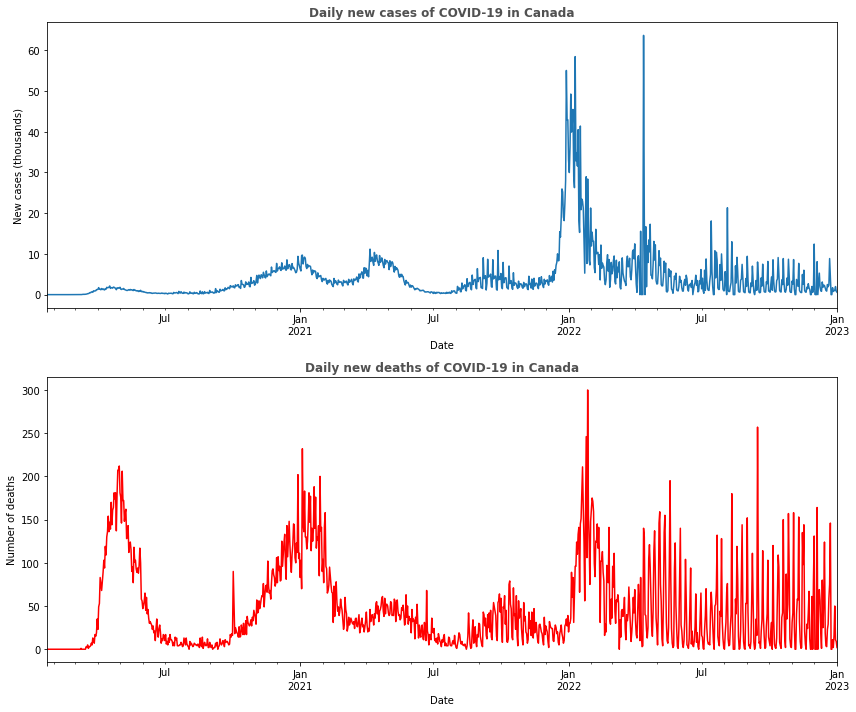

In [ ]:
# Plotting new cases and new deaths in Canada
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1, figsize=(12,10))

(df_canada['new_cases'] / 1000).plot(kind="line", ax=ax1)
ax1.set_title("Daily new cases of COVID-19 in Canada", color = grey_text, fontweight='bold')

# add_titlebox(ax1, 'Total Cases of COVID-19 in the World')
ax1.set_ylabel("New cases (thousands)")
ax1.set_xlabel("Date")

(df_canada['new_deaths']).plot(kind="line", ax=ax2, color="r")
#ax2.set_title("Mortes por Covid-19 no Mundo")
ax2.set_title("Daily new deaths of COVID-19 in Canada", color = grey_text, fontweight='bold')
ax2.set_ylabel("Number of deaths")
ax2.set_xlabel("Date")

plt.tight_layout()

Let's check when was the first register of the vaccine and the first booster in Canada.

In [ ]:
# Checking the first vaccine date
df_canada.loc[df_canada['people_vaccinated']> 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-14,CAN,North America,Canada,2020-12-14,475836.0,8545.0,6702.714,13661.0,143.0,111.857,12374.056,222.212,174.303,355.253,3.719,2.909,1.05,659.0,17.137,3485.0,90.627,NaN,NaN,NaN,NaN,16008664.0,131408.0,419.569,3.444,126618.0,3.319,0.0529,18.9,tests performed,5.0,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,72.69,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN


The first vaccine administered in Canada occurred in **2020-12-14**.


In [ ]:
# Checking the first booster date
df_canada.loc[df_canada['total_boosters']> 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-11,CAN,North America,Canada,2021-02-11,821035.0,3376.0,3278.857,21089.0,84.0,82.143,21350.913,87.792,85.266,548.417,2.184,2.136,0.87,595.0,15.473,2511.0,65.298,NaN,NaN,NaN,NaN,22671229.0,114132.0,594.187,2.991,103342.0,2.708,0.0317,31.5,tests performed,1207876.0,958044.0,249829.0,3.0,33785.0,24457.0,3.14,2.49,0.65,0.0,636.0,9514.0,0.025,75.46,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN



The first booster administered in Canada occurred in **2021-02-11**.

Canada started the vaccination in mid-December of 2020.

The booster started to be administered in mid-February 2021.

According to specialists, regardless of which vaccine we get, we will not reach full protection until two weeks after the second or final dose. That’s about how long it takes the immune system to mount an antibody response to the vaccine.

Knowing that, we can see how starting in March, the daily total of death started to drop as vaccination and booster doses administered increased.

We can see some peaks of the number of deaths at the beginning of 2022, as we had an abrupt growth in the total number of cases in the same period. The maximum number of deaths registered in Canada in a day was 300 (in January 2022).

Let's verify the percentage of people fully vaccinated in Canada (those who received at least 2 doses of the vaccine), on the most recent date with the information available (2022-12-30).

I will use the `df_canada` dataset, filtering for 2022-12-30.

In [ ]:
df_canada.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-28,CAN,North America,Canada,2022-12-28,4501242.0,952.0,2375.857,49168.0,16.0,35.714,117054.236,24.757,61.784,1278.608,0.416,0.929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96248636.0,34609011.0,31728726.0,29910899.0,12882.0,28258.0,250.29,90.00,82.51,77.78,735.0,8972.0,0.023,NaN,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
2022-12-29,CAN,North America,Canada,2022-12-29,4502350.0,1108.0,1268.286,49218.0,50.0,32.143,117083.050,28.813,32.982,1279.908,1.300,0.836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96268870.0,34613153.0,31729552.0,29926165.0,20234.0,11056.0,250.35,90.01,82.51,77.82,288.0,2333.0,0.006,NaN,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
2022-12-30,CAN,North America,Canada,2022-12-30,4504331.0,1981.0,931.571,49229.0,11.0,12.857,117134.565,51.516,24.225,1280.194,0.286,0.334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96275848.0,34616759.0,31729814.0,29929275.0,6978.0,8005.0,250.36,90.02,82.51,77.83,208.0,1889.0,0.005,NaN,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
2022-12-31,CAN,North America,Canada,2022-12-31,4505142.0,811.0,1047.429,49238.0,9.0,14.143,117155.655,21.090,27.238,1280.428,0.234,0.368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
2023-01-01,CAN,North America,Canada,2023-01-01,4505742.0,600.0,1133.143,49240.0,2.0,14.429,117171.258,15.603,29.467,1280.480,0.052,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN


82.51298527437537


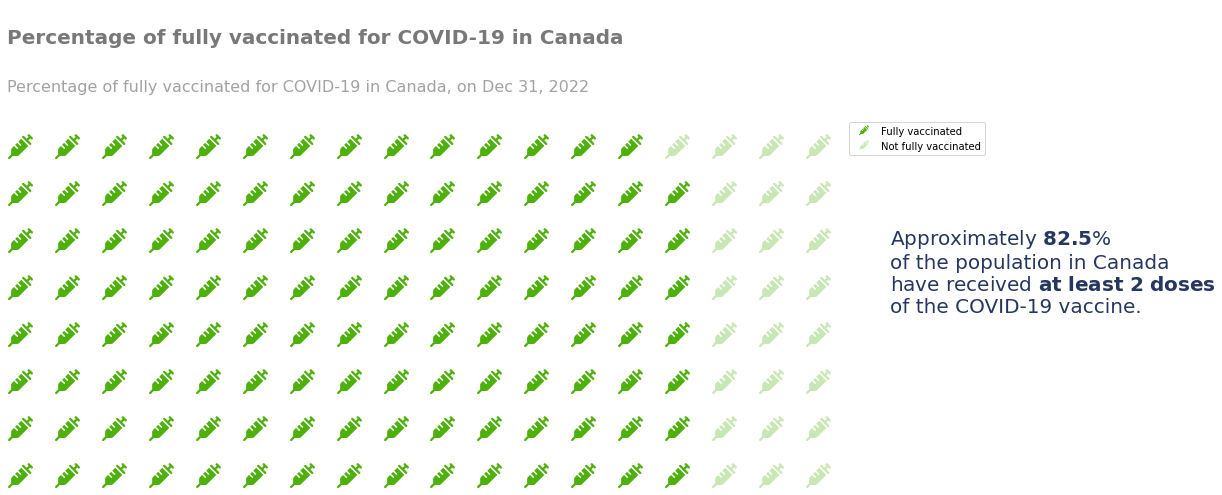

In [ ]:
# Total people fully vaccinated in Canada 
ttl_fully_vac = df_canada.loc[(df_canada['date'] == '2022-12-30')]['people_fully_vaccinated'].item()
ttl_fully_vac

# Total population in Canada
population = df_canada.loc[(df_canada['date'] == '2022-12-30')]['population'].item()
population


# Percentage of fully vaccinated for COVID-19 in Canada
prop_vaccinated = (ttl_fully_vac / population) * 100
prop_vaccinated
print(prop_vaccinated)


# Plotting 
fig = plt.figure(
    FigureClass=Waffle,
    figsize=(15,8),
    rows=8,
    columns=18,
    # colors=("#232066", "#B0C4DE"),
    colors=("#4EB00A", "#c9e7b5"),
    values=[prop_vaccinated, 100-prop_vaccinated], icons='syringe', icon_size=25,
    icon_legend=True,
    legend={
        'labels': ['Fully vaccinated', 'Not fully vaccinated'],
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1)
    }
)

plt.text(0, 1.2, '\nPercentage of fully vaccinated for COVID-19 in Canada',
         fontsize=20, 
         color="#787878",
         weight='bold')

plt.text(0, 1.15,
         "\nPercentage of fully vaccinated for COVID-19 in Canada, on Dec 31, 2022",
         verticalalignment="top",
         fontsize=16,
         color="#A2A1A3")

plt.text(2.4, 0.7,
         "Approximately "
         "$\\bf{82.5}$%\n"
         "of the population in Canada\n"
         "have received $\\bf{at}$ $\\bf{least}$ $\\bf{2}$ $\\bf{doses}$\n"
         "of the COVID-19 vaccine.",
         verticalalignment="top",
         fontsize=20,
         color="#253760")


fig.set_tight_layout(False)
plt.show();

# **Conclusion**

The analysis presented information about the COVID-19 worldwide. First, it was possible to see the countries with the most total cases and deaths and how those numbers changed after the vaccines started being administered in December 2020.

I also extracted some insights about the pandemic in Canada, pointing out how the country has been affected in terms of cases, deaths, and the positive results of the vaccine.

Finally, this exploratory analysis showed that the pandemic is still part of the global scenario, and we should still stay careful with the virus.

<br/>

Questions, suggestions for improvement, and corrections are welcome, and thank you for analyzing the data with me so far!

## Resources used
* [Hands-on Data Science by Sigmoidal](https://sigmoidal.ai/)
* [Python Programming](https://www.python.org/)
* [Covid-19 - Data Source](https://github.com/owid/covid-19-data/tree/master/public/data)
* [Missing values](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/)
* [Statcan](https://www12.statcan.gc.ca/census-recensement/index-eng.cfm)
* [Vaccines information in Canada](https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19/vaccines/how-vaccinated.html)
